# Wrangle and Analyze Data Project

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy as tweepy
import json
from tweepy.parsers import JSONParser
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

## Gather Data

In [2]:
# Read in the twitter archive enhanced csv given to us
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Gather image predictions from Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Save the provided image predictions
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [5]:
# Read the image predictions tsv file into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# Access the twitter archives using your unique keys and tokens
consumer_key = '##########'
consumer_secret = '##########'
access_token = '##########'
access_secret = '##########'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=JSONParser(), wait_on_rate_limit=True)

In [82]:
#api
api

In [83]:
# Api for a specific id
tweet = api.get_status(887473957103951883,tweet_mode='extended')
#View out the result's of api
print(tweet['id'])
print(tweet['retweet_count'])

887473957103951883
16495


In [125]:
# using twitter api to get data.
df_list = []
errors_list = []
tweets = df_twitter_archive['tweet_id']
now = time.time()
for index, t in enumerate(tweets):
    try:
        start = time.time()
        tweet = api.get_status(t,tweet_mode='extended')
        end = time.time()
        print("Reading Tweet {}/{}. ({}%) completed".format((index+1),len(tweets), round(((index+1)/len(tweets)) * 100,1)))
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_list.append({'tweet_id':int(t),
                        'retweet_count':int(retweet_count),
                        'favorite_count':int(favorite_count)
                       })
    except Exception as e:
        print(str(t) + str(e))
        errors_list.append(t)

Reading Tweet 1/2356. (0.0%) completed
Reading Tweet 2/2356. (0.1%) completed
Reading Tweet 3/2356. (0.1%) completed
Reading Tweet 4/2356. (0.2%) completed
Reading Tweet 5/2356. (0.2%) completed
Reading Tweet 6/2356. (0.3%) completed
Reading Tweet 7/2356. (0.3%) completed
Reading Tweet 8/2356. (0.3%) completed
Reading Tweet 9/2356. (0.4%) completed
Reading Tweet 10/2356. (0.4%) completed
Reading Tweet 11/2356. (0.5%) completed
Reading Tweet 12/2356. (0.5%) completed
Reading Tweet 13/2356. (0.6%) completed
Reading Tweet 14/2356. (0.6%) completed
Reading Tweet 15/2356. (0.6%) completed
Reading Tweet 16/2356. (0.7%) completed
Reading Tweet 17/2356. (0.7%) completed
Reading Tweet 18/2356. (0.8%) completed
Reading Tweet 19/2356. (0.8%) completed
888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 21/2356. (0.9%) completed
Reading Tweet 22/2356. (0.9%) completed
Reading Tweet 23/2356. (1.0%) completed
Reading Tweet 24/2356. (1.0%) completed
Reading Twe

Reading Tweet 197/2356. (8.4%) completed
Reading Tweet 198/2356. (8.4%) completed
Reading Tweet 199/2356. (8.4%) completed
Reading Tweet 200/2356. (8.5%) completed
Reading Tweet 201/2356. (8.5%) completed
Reading Tweet 202/2356. (8.6%) completed
Reading Tweet 203/2356. (8.6%) completed
Reading Tweet 204/2356. (8.7%) completed
Reading Tweet 205/2356. (8.7%) completed
Reading Tweet 206/2356. (8.7%) completed
Reading Tweet 207/2356. (8.8%) completed
Reading Tweet 208/2356. (8.8%) completed
Reading Tweet 209/2356. (8.9%) completed
Reading Tweet 210/2356. (8.9%) completed
Reading Tweet 211/2356. (9.0%) completed
851953902622658560[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 213/2356. (9.0%) completed
Reading Tweet 214/2356. (9.1%) completed
Reading Tweet 215/2356. (9.1%) completed
Reading Tweet 216/2356. (9.2%) completed
Reading Tweet 217/2356. (9.2%) completed
Reading Tweet 218/2356. (9.3%) completed
Reading Tweet 219/2356. (9.3%) completed
Reading Tweet 220/23

Reading Tweet 387/2356. (16.4%) completed
Reading Tweet 388/2356. (16.5%) completed
Reading Tweet 389/2356. (16.5%) completed
Reading Tweet 390/2356. (16.6%) completed
Reading Tweet 391/2356. (16.6%) completed
Reading Tweet 392/2356. (16.6%) completed
Reading Tweet 393/2356. (16.7%) completed
Reading Tweet 394/2356. (16.7%) completed
Reading Tweet 395/2356. (16.8%) completed
Reading Tweet 396/2356. (16.8%) completed
Reading Tweet 397/2356. (16.9%) completed
Reading Tweet 398/2356. (16.9%) completed
Reading Tweet 399/2356. (16.9%) completed
Reading Tweet 400/2356. (17.0%) completed
Reading Tweet 401/2356. (17.0%) completed
Reading Tweet 402/2356. (17.1%) completed
Reading Tweet 403/2356. (17.1%) completed
Reading Tweet 404/2356. (17.1%) completed
Reading Tweet 405/2356. (17.2%) completed
Reading Tweet 406/2356. (17.2%) completed
Reading Tweet 407/2356. (17.3%) completed
Reading Tweet 408/2356. (17.3%) completed
Reading Tweet 409/2356. (17.4%) completed
Reading Tweet 410/2356. (17.4%) co

Reading Tweet 581/2356. (24.7%) completed
Reading Tweet 582/2356. (24.7%) completed
Reading Tweet 583/2356. (24.7%) completed
Reading Tweet 584/2356. (24.8%) completed
Reading Tweet 585/2356. (24.8%) completed
Reading Tweet 586/2356. (24.9%) completed
Reading Tweet 587/2356. (24.9%) completed
Reading Tweet 588/2356. (25.0%) completed
Reading Tweet 589/2356. (25.0%) completed
Reading Tweet 590/2356. (25.0%) completed
Reading Tweet 591/2356. (25.1%) completed
Reading Tweet 592/2356. (25.1%) completed
Reading Tweet 593/2356. (25.2%) completed
Reading Tweet 594/2356. (25.2%) completed
Reading Tweet 595/2356. (25.3%) completed
Reading Tweet 596/2356. (25.3%) completed
Reading Tweet 597/2356. (25.3%) completed
Reading Tweet 598/2356. (25.4%) completed
Reading Tweet 599/2356. (25.4%) completed
Reading Tweet 600/2356. (25.5%) completed
Reading Tweet 601/2356. (25.5%) completed
Reading Tweet 602/2356. (25.6%) completed
Reading Tweet 603/2356. (25.6%) completed
Reading Tweet 604/2356. (25.6%) co

Reading Tweet 764/2356. (32.4%) completed
Reading Tweet 765/2356. (32.5%) completed
Reading Tweet 766/2356. (32.5%) completed
Reading Tweet 767/2356. (32.6%) completed
Reading Tweet 768/2356. (32.6%) completed
Reading Tweet 769/2356. (32.6%) completed
Reading Tweet 770/2356. (32.7%) completed
Reading Tweet 771/2356. (32.7%) completed
Reading Tweet 772/2356. (32.8%) completed
Reading Tweet 773/2356. (32.8%) completed
Reading Tweet 774/2356. (32.9%) completed
Reading Tweet 775/2356. (32.9%) completed
Reading Tweet 776/2356. (32.9%) completed
Reading Tweet 777/2356. (33.0%) completed
Reading Tweet 778/2356. (33.0%) completed
Reading Tweet 779/2356. (33.1%) completed
Reading Tweet 780/2356. (33.1%) completed
Reading Tweet 781/2356. (33.1%) completed
Reading Tweet 782/2356. (33.2%) completed
Reading Tweet 783/2356. (33.2%) completed
Reading Tweet 784/2356. (33.3%) completed
775096608509886464[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 786/2356. (33.4%) complete

Reading Tweet 955/2356. (40.5%) completed
Reading Tweet 956/2356. (40.6%) completed
Reading Tweet 957/2356. (40.6%) completed
Reading Tweet 958/2356. (40.7%) completed
Reading Tweet 959/2356. (40.7%) completed
Reading Tweet 960/2356. (40.7%) completed
Reading Tweet 961/2356. (40.8%) completed
Reading Tweet 962/2356. (40.8%) completed
Reading Tweet 963/2356. (40.9%) completed
Reading Tweet 964/2356. (40.9%) completed
Reading Tweet 965/2356. (41.0%) completed
Reading Tweet 966/2356. (41.0%) completed
Reading Tweet 967/2356. (41.0%) completed
Reading Tweet 968/2356. (41.1%) completed
Reading Tweet 969/2356. (41.1%) completed
Reading Tweet 970/2356. (41.2%) completed
Reading Tweet 971/2356. (41.2%) completed
Reading Tweet 972/2356. (41.3%) completed
Reading Tweet 973/2356. (41.3%) completed
Reading Tweet 974/2356. (41.3%) completed
Reading Tweet 975/2356. (41.4%) completed
Reading Tweet 976/2356. (41.4%) completed
Reading Tweet 977/2356. (41.5%) completed
Reading Tweet 978/2356. (41.5%) co

Reading Tweet 1147/2356. (48.7%) completed
Reading Tweet 1148/2356. (48.7%) completed
Reading Tweet 1149/2356. (48.8%) completed
Reading Tweet 1150/2356. (48.8%) completed
Reading Tweet 1151/2356. (48.9%) completed
Reading Tweet 1152/2356. (48.9%) completed
Reading Tweet 1153/2356. (48.9%) completed
Reading Tweet 1154/2356. (49.0%) completed
Reading Tweet 1155/2356. (49.0%) completed
Reading Tweet 1156/2356. (49.1%) completed
Reading Tweet 1157/2356. (49.1%) completed
Reading Tweet 1158/2356. (49.2%) completed
Reading Tweet 1159/2356. (49.2%) completed
Reading Tweet 1160/2356. (49.2%) completed
Reading Tweet 1161/2356. (49.3%) completed
Reading Tweet 1162/2356. (49.3%) completed
Reading Tweet 1163/2356. (49.4%) completed
Reading Tweet 1164/2356. (49.4%) completed
Reading Tweet 1165/2356. (49.4%) completed
Reading Tweet 1166/2356. (49.5%) completed
Reading Tweet 1167/2356. (49.5%) completed
Reading Tweet 1168/2356. (49.6%) completed
Reading Tweet 1169/2356. (49.6%) completed
Reading Twe

Reading Tweet 1338/2356. (56.8%) completed
Reading Tweet 1339/2356. (56.8%) completed
Reading Tweet 1340/2356. (56.9%) completed
Reading Tweet 1341/2356. (56.9%) completed
Reading Tweet 1342/2356. (57.0%) completed
Reading Tweet 1343/2356. (57.0%) completed
Reading Tweet 1344/2356. (57.0%) completed
Reading Tweet 1345/2356. (57.1%) completed
Reading Tweet 1346/2356. (57.1%) completed
Reading Tweet 1347/2356. (57.2%) completed
Reading Tweet 1348/2356. (57.2%) completed
Reading Tweet 1349/2356. (57.3%) completed
Reading Tweet 1350/2356. (57.3%) completed
Reading Tweet 1351/2356. (57.3%) completed
Reading Tweet 1352/2356. (57.4%) completed
Reading Tweet 1353/2356. (57.4%) completed
Reading Tweet 1354/2356. (57.5%) completed
Reading Tweet 1355/2356. (57.5%) completed
Reading Tweet 1356/2356. (57.6%) completed
Reading Tweet 1357/2356. (57.6%) completed
Reading Tweet 1358/2356. (57.6%) completed
Reading Tweet 1359/2356. (57.7%) completed
Reading Tweet 1360/2356. (57.7%) completed
Reading Twe

Reading Tweet 1529/2356. (64.9%) completed
Reading Tweet 1530/2356. (64.9%) completed
Reading Tweet 1531/2356. (65.0%) completed
Reading Tweet 1532/2356. (65.0%) completed
Reading Tweet 1533/2356. (65.1%) completed
Reading Tweet 1534/2356. (65.1%) completed
Reading Tweet 1535/2356. (65.2%) completed
Reading Tweet 1536/2356. (65.2%) completed
Reading Tweet 1537/2356. (65.2%) completed
Reading Tweet 1538/2356. (65.3%) completed
Reading Tweet 1539/2356. (65.3%) completed
Reading Tweet 1540/2356. (65.4%) completed
Reading Tweet 1541/2356. (65.4%) completed
Reading Tweet 1542/2356. (65.4%) completed
Reading Tweet 1543/2356. (65.5%) completed
Reading Tweet 1544/2356. (65.5%) completed
Reading Tweet 1545/2356. (65.6%) completed
Reading Tweet 1546/2356. (65.6%) completed
Reading Tweet 1547/2356. (65.7%) completed
Reading Tweet 1548/2356. (65.7%) completed
Reading Tweet 1549/2356. (65.7%) completed
Reading Tweet 1550/2356. (65.8%) completed
Reading Tweet 1551/2356. (65.8%) completed
Reading Twe

Reading Tweet 1720/2356. (73.0%) completed
Reading Tweet 1721/2356. (73.0%) completed
Reading Tweet 1722/2356. (73.1%) completed
Reading Tweet 1723/2356. (73.1%) completed
Reading Tweet 1724/2356. (73.2%) completed
Reading Tweet 1725/2356. (73.2%) completed
Reading Tweet 1726/2356. (73.3%) completed
680055455951884288[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 1728/2356. (73.3%) completed
Reading Tweet 1729/2356. (73.4%) completed
Reading Tweet 1730/2356. (73.4%) completed
Reading Tweet 1731/2356. (73.5%) completed
Reading Tweet 1732/2356. (73.5%) completed
Reading Tweet 1733/2356. (73.6%) completed
Reading Tweet 1734/2356. (73.6%) completed
Reading Tweet 1735/2356. (73.6%) completed
Reading Tweet 1736/2356. (73.7%) completed
Reading Tweet 1737/2356. (73.7%) completed
Reading Tweet 1738/2356. (73.8%) completed
Reading Tweet 1739/2356. (73.8%) completed
Reading Tweet 1740/2356. (73.9%) completed
Reading Tweet 1741/2356. (73.9%) completed
Reading Tweet 1742/

Reading Tweet 1796/2356. (76.2%) completed
Reading Tweet 1797/2356. (76.3%) completed
Reading Tweet 1798/2356. (76.3%) completed
Reading Tweet 1799/2356. (76.4%) completed
Reading Tweet 1800/2356. (76.4%) completed
Reading Tweet 1801/2356. (76.4%) completed
Reading Tweet 1802/2356. (76.5%) completed
Reading Tweet 1803/2356. (76.5%) completed
Reading Tweet 1804/2356. (76.6%) completed
Reading Tweet 1805/2356. (76.6%) completed
Reading Tweet 1806/2356. (76.7%) completed
Reading Tweet 1807/2356. (76.7%) completed
Reading Tweet 1808/2356. (76.7%) completed
Reading Tweet 1809/2356. (76.8%) completed
Reading Tweet 1810/2356. (76.8%) completed
Reading Tweet 1811/2356. (76.9%) completed
Reading Tweet 1812/2356. (76.9%) completed
Reading Tweet 1813/2356. (77.0%) completed
Reading Tweet 1814/2356. (77.0%) completed
Reading Tweet 1815/2356. (77.0%) completed
Reading Tweet 1816/2356. (77.1%) completed
Reading Tweet 1817/2356. (77.1%) completed
Reading Tweet 1818/2356. (77.2%) completed
Reading Twe

Reading Tweet 1987/2356. (84.3%) completed
Reading Tweet 1988/2356. (84.4%) completed
Reading Tweet 1989/2356. (84.4%) completed
Reading Tweet 1990/2356. (84.5%) completed
Reading Tweet 1991/2356. (84.5%) completed
Reading Tweet 1992/2356. (84.6%) completed
Reading Tweet 1993/2356. (84.6%) completed
Reading Tweet 1994/2356. (84.6%) completed
Reading Tweet 1995/2356. (84.7%) completed
Reading Tweet 1996/2356. (84.7%) completed
Reading Tweet 1997/2356. (84.8%) completed
Reading Tweet 1998/2356. (84.8%) completed
Reading Tweet 1999/2356. (84.8%) completed
Reading Tweet 2000/2356. (84.9%) completed
Reading Tweet 2001/2356. (84.9%) completed
Reading Tweet 2002/2356. (85.0%) completed
Reading Tweet 2003/2356. (85.0%) completed
Reading Tweet 2004/2356. (85.1%) completed
Reading Tweet 2005/2356. (85.1%) completed
Reading Tweet 2006/2356. (85.1%) completed
Reading Tweet 2007/2356. (85.2%) completed
Reading Tweet 2008/2356. (85.2%) completed
Reading Tweet 2009/2356. (85.3%) completed
Reading Twe

Reading Tweet 2178/2356. (92.4%) completed
Reading Tweet 2179/2356. (92.5%) completed
Reading Tweet 2180/2356. (92.5%) completed
Reading Tweet 2181/2356. (92.6%) completed
Reading Tweet 2182/2356. (92.6%) completed
Reading Tweet 2183/2356. (92.7%) completed
Reading Tweet 2184/2356. (92.7%) completed
Reading Tweet 2185/2356. (92.7%) completed
Reading Tweet 2186/2356. (92.8%) completed
Reading Tweet 2187/2356. (92.8%) completed
Reading Tweet 2188/2356. (92.9%) completed
Reading Tweet 2189/2356. (92.9%) completed
Reading Tweet 2190/2356. (93.0%) completed
Reading Tweet 2191/2356. (93.0%) completed
Reading Tweet 2192/2356. (93.0%) completed
Reading Tweet 2193/2356. (93.1%) completed
Reading Tweet 2194/2356. (93.1%) completed
Reading Tweet 2195/2356. (93.2%) completed
Reading Tweet 2196/2356. (93.2%) completed
Reading Tweet 2197/2356. (93.3%) completed
Reading Tweet 2198/2356. (93.3%) completed
Reading Tweet 2199/2356. (93.3%) completed
Reading Tweet 2200/2356. (93.4%) completed
Reading Twe

In [126]:
#check for error where tweet are not found:
errors_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 788765914992902144,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288,
 677644091929329666,
 677573743309385728,
 677565715327688705,
 677557565589463040,
 677547928504967168,
 677530072887205888,
 677335745548390400,
 677334615166730240,
 677331501395156992,
 677328882937298944]

In [86]:
# save df of queried tweets to JSON and then convert to a dataframe
new_data = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
new_data.to_json('tweet_json.txt')
new_data = pd.read_json('tweet_json.txt')
new_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7740,36370
1,892177421306343426,5730,31322
2,891815181378084864,3790,23595
3,891689557279858688,7894,39655
4,891327558926688256,8525,37849


## Assess Data

### **df_twitter_archive assessments**<br />

In [81]:
df_twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [80]:
df_twitter_archive.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
286,838831947270979586,NaN,NaN,2017-03-06 19:21:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Riley. His owner put a donut pillow around him and he loves it so much he won't let anyone take it off. 13/10 https:…,7.838400e+17,4.196984e+09,2016-10-06 01:23:05 +0000,"https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.co...",13,10,Riley,None,None,None,None
1329,705898680587526145,NaN,NaN,2016-03-04 23:32:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Max. He's a Fallopian Cephalopuff. Eyes are magical af. Lil dandruff problem. No big deal 10/10 would still pet https://t.co/c67nUjwmFs,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/705898680587526145/photo/1,https://twitter.com/dog_rates/status/705898680587526145/photo/1",10,10,Max,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910803644416/photo/1,10,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1835,676101918813499392,NaN,NaN,2015-12-13 18:10:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Striker. He's ready for Christmas. 11/10 https://t.co/B3xxSLjQSH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676101918813499392/photo/1,11,10,Striker,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.co...",84,70,None,None,None,None,None
2255,667773195014021121,NaN,NaN,2015-11-20 18:35:10 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667773195014021121/photo/1,8,10,a,None,None,None,None


In [15]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df_twitter_archive['expanded_urls'].isnull().sum()

59

In [115]:
#Checking the descriptive statistics 
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df_twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Leonard        1
Strider        1
Jordy          1
Sojourner      1
Noah           1
Name: name, Length: 957, dtype: int64

In [20]:
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**observations**

quality issues:
- Name column has un real name like "None", "a", "the", "an", "Null", "or", "lol" and "blackie" that has to be changed
- timestamp date is incorrect format(unecessary +0000 in date). The timestamp data type is wrong; object should be changed to time
- data type of tweet_id should be string instead of object
- there are 59 null entries in the expanded_urls column
- rating_denominator column should only have one denominator value - 10 
- rating_numerator have values lower than 10 that should be removed.
- some ratings can be extracted from the text of the tweet and be used to fill in the rating_numerator column<br />

tidiness issues:<br />
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns have null values in them. This is an issue because we want only the original tweets. We will drop these columns later in the project.

### **image_predictions assessments**

In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1006,709158332880297985,https://pbs.twimg.com/media/CddvvSwWoAUObQw.jpg,1,Siberian_husky,0.212957,True,Eskimo_dog,0.178887,True,Labrador_retriever,0.174218,True
271,670823764196741120,https://pbs.twimg.com/media/CU8-puBWwAAR8Xl.jpg,1,Labrador_retriever,0.947453,True,German_short-haired_pointer,0.017001,True,Weimaraner,0.015432,True
1998,875144289856114688,https://pbs.twimg.com/ext_tw_video_thumb/87514...,1,Siberian_husky,0.245048,True,Pembroke,0.223716,True,dingo,0.160753,False
804,691675652215414786,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1,Chihuahua,0.182898,True,teddy,0.128077,False,West_Highland_white_terrier,0.097875,True
1160,734776360183431168,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,1,Siberian_husky,0.304902,True,Eskimo_dog,0.155147,True,malamute,0.050942,True
509,676101918813499392,https://pbs.twimg.com/media/CWH_FTgWIAAwOUy.jpg,1,Shih-Tzu,0.225848,True,Norfolk_terrier,0.186873,True,Irish_terrier,0.106987,True
1305,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,bluetick,0.360071,True,crutch,0.134816,False,tripod,0.098207,False
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.579472,True,toy_poodle,0.133446,True,Shih-Tzu,0.094397,True


**observations** <br />

quality issues:<br />
- some names of dogs are capitalized and some are not in the p1, p2, and p3 columns

tidiness issues: <br />
- df_twitter_archive, image predictions, and new_data can be combined into one table since they all describe one tweet

### **new_data assessments**

In [87]:
new_data.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7740,36370
1,892177421306343426,5730,31322
2,891815181378084864,3790,23595


In [88]:
#Gathering information about the data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 72.8 KB


**observations**<br />

tidiness issues: <br />
- "Unamed: 0" column should be dropped since it is only an index column

## Clean Data

In [94]:
# Make a copy of the dataframes before starting the cleaning process
new_df_twitter_archive = df_twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
new_data2 = new_data.copy()

### Clean 8 Quality Issues

**Issue #1:**<br />

**Define** <br />
Dog names "None", "a", "the" and "an" should be replaced

**Code**

In [97]:
# Replace the dog names that are not names to NaN. There are many more dog names that are not really dog names 
# but for this example, we will only clean the ones found in the value_counts listing from the assessments above
new_df_twitter_archive['name'].replace("None", "NaN", inplace= True)
new_df_twitter_archive['name'].replace("a", "NaN", inplace= True)
new_df_twitter_archive['name'].replace("the", "NaN", inplace= True)
new_df_twitter_archive['name'].replace("an", "NaN", inplace= True)
new_df_twitter_archive['name'].replace("Null", "NaN", inplace= True)
new_df_twitter_archive['name'].replace("or", "NaN", inplace= True)
new_df_twitter_archive['name'].replace("lol", "NaN", inplace= True)
new_df_twitter_archive['name'].replace("blackie", "NaN", inplace= True)

'None' in new_df_twitter_archive['name']
'a' in new_df_twitter_archive['name']
'the' in new_df_twitter_archive['name']
'an' in new_df_twitter_archive['name']
'Null' in new_df_twitter_archive['name']
'or' in new_df_twitter_archive['name']
'lol' in new_df_twitter_archive['name']
'blackie' in new_df_twitter_archive['name']

False

**Issue #2:** <br />

**Define**<br />
Timestamp format is incorrect. Change timestamp data type from object to datetime. The +0000 will drop

In [98]:
new_df_twitter_archive['timestamp'] = pd.to_datetime(new_df_twitter_archive['timestamp'])
new_df_twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


**Issue #3:**<br />

**Define** <br />
Data type of tweet_id should be string, not object. We need to change the tweet_id of image_predictions_clean dataframe and new_data2  dataframe to string as well.

**Code**

In [101]:
new_df_twitter_archive.tweet_id = new_df_twitter_archive.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
new_data2.tweet_id = new_data2.tweet_id.astype(str)

#view out result's
new_df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Issue #4:** <br />

**Define**<br />
The expanded_urls column has null values that need to be dropped. There are 59 total that we observed from the assessments.

**Code**

In [102]:
# Drop the null values in the expanded_urls column
new_df_twitter_archive["expanded_urls"].dropna(inplace= True)
#view out result's
"NaN" in new_df_twitter_archive["expanded_urls"]

False

**Issue #5:** <br />

**Define**<br />
The rating_denominator column should only have the denominator 10

**Code**

In [103]:
new_df_twitter_archive["rating_denominator"] = 10
new_df_twitter_archive.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

**Issue #6:** <br />

**Define**<br />
The numerator column should exclude numbers less than 10 but just for an example, we will only exclude the values 0, 1, and 2. There should be 20 entries excluded based on the assessments we have done but because we have already started cleaning and dropping columns and rows, there are only 15 entries to be excluded now.

**Code**

In [106]:
# Recreate the dataframe by excluding the rating_numerator that are equal to 0, 1, and 2
new_df_twitter_archive = new_df_twitter_archive[new_df_twitter_archive.rating_numerator != 0]
new_df_twitter_archive = new_df_twitter_archive[new_df_twitter_archive.rating_numerator != 1]
new_df_twitter_archive = new_df_twitter_archive[new_df_twitter_archive.rating_numerator != 2]
#result 
new_df_twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
420       2
15        2
75        2
17        1
121       1
99        1
45        1
27        1
20        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
144       1
182       1
204       1
143       1
666       1
960       1
1776      1
165       1
Name: rating_numerator, dtype: int64

**Issue #7:** <br />

**Define**<br />
We can extract numerator ratings from the tweet text and fill the missing values in rating_numerator column by finding the pattern ##.##

**Code**

In [109]:
new_df_twitter_archive['rating_numerator'] = new_df_twitter_archive.text.str.extract('(\d?\d*\.?\d\d*/)', expand=False)
new_df_twitter_archive[new_df_twitter_archive['tweet_id']=='680494726643068929']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26/,10,NaN,None,None,None,None


**Issue #8:** <br />

**Define**<br />

Replace the / character from the rating_numerator column

**Code**

In [110]:
new_df_twitter_archive['rating_numerator'].replace('/','', regex=True, inplace=True)
new_df_twitter_archive[new_df_twitter_archive['tweet_id']=='680494726643068929']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,NaN,None,None,None,None


**Issue #9:** <br />

**Define**<br />
There are capitalized and lower cased names in the p1, p2, and p3 columns. Replace all dog names in these columns with a lower case letter.

**Code**

In [42]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

**Test**

In [43]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
1481,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,0.036469,False
941,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,great_pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True
1910,853299958564483072,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,grille,0.652280,False,beach_wagon,0.112846,False,convertible,0.086252,False
492,675706639471788032,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,english_springer,0.990300,True,welsh_springer_spaniel,0.002080,True,cocker_spaniel,0.002014,True
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True
911,700796979434098688,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,1,tailed_frog,0.652712,False,tree_frog,0.280212,False,bullfrog,0.040177,False
1009,709225125749587968,https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg,1,labrador_retriever,0.271109,True,pomeranian,0.150487,True,golden_retriever,0.145578,True
79,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,labrador_retriever,0.825670,True,french_bulldog,0.056639,True,staffordshire_bullterrier,0.054018,True
1549,792913359805018113,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False


### Clean 2 Tidiness Issues

**Issue #1:**<br />

**Define** <br />
We can combine all three datasets into one dataset called twitter_master_df. First we will combine the df_twitter_archive_clean dataset with image_predictions_clean dataset. Then we will combine that dataset with the new_data2 dataset to make one master dataset.

**Code**

In [77]:
archive_predictions = pd.merge(new_df_twitter_archive, image_predictions_clean, how='left', on='tweet_id')
archive_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2335
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2336 non-null   object             
 1   timestamp           2336 non-null   datetime64[ns, UTC]
 2   source              2336 non-null   object             
 3   text                2336 non-null   object             
 4   expanded_urls       2280 non-null   object             
 5   rating_numerator    2336 non-null   object             
 6   rating_denominator  2336 non-null   int64              
 7   name                2336 non-null   object             
 8   doggo               2336 non-null   object             
 9   floofer             2336 non-null   object             
 10  pupper              2336 non-null   object             
 11  puppo               2336 non-null   object             
 12  jpg_url             2059 non-null 

**Issue #2:**<br />

**Define**<br />
Combine the archive_predictions dataset with the new_data2 dataset to make a master dataset.

**Code**

In [93]:
df_twitter_master = pd.merge(archive_predictions, new_data2, how='left', on='tweet_id')
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2335
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2336 non-null   object             
 1   timestamp           2336 non-null   datetime64[ns, UTC]
 2   source              2336 non-null   object             
 3   text                2336 non-null   object             
 4   expanded_urls       2280 non-null   object             
 5   rating_numerator    2336 non-null   object             
 6   rating_denominator  2336 non-null   int64              
 7   name                2336 non-null   object             
 8   doggo               2336 non-null   object             
 9   floofer             2336 non-null   object             
 10  pupper              2336 non-null   object             
 11  puppo               2336 non-null   object             
 12  jpg_url             2059 non-null 

**Issue #3:**<br />

**Define**<br />
Drop any rows that do not contain a jpg_url. This will enable easier analyses later on.

**Code**

In [51]:
df_twitter_master = df_twitter_master[df_twitter_master['jpg_url'].notnull()]

**Test**

In [52]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2335
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   object             
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   object             
 6   rating_denominator  2059 non-null   int64              
 7   name                2059 non-null   object             
 8   doggo               2059 non-null   object             
 9   floofer             2059 non-null   object             
 10  pupper              2059 non-null   object             
 11  puppo               2059 non-null   object             
 12  jpg_url             2059 non-null 

**Define**<br />
Set the following columns to the correct data type:<br />
p1_dog, p2_dog, p3_dog --> bool<br />
rating_numerator --> float<br />

**Code**

In [53]:
df_twitter_master['p1_dog'] = df_twitter_master['p1_dog'].astype(bool)
df_twitter_master['p2_dog'] = df_twitter_master['p2_dog'].astype(bool)
df_twitter_master['p3_dog'] = df_twitter_master['p3_dog'].astype(bool)
df_twitter_master['rating_numerator'] = df_twitter_master['rating_numerator'].astype(float)

**Test**

In [54]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2335
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   object             
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   float64            
 6   rating_denominator  2059 non-null   int64              
 7   name                2059 non-null   object             
 8   doggo               2059 non-null   object             
 9   floofer             2059 non-null   object             
 10  pupper              2059 non-null   object             
 11  puppo               2059 non-null   object             
 12  jpg_url             2059 non-null 

**Issue #4(for fun):**<br />

**Define** <br />
The columns doggo, floofer, pupper, and puppo can be condensed into one column called Stage with the possible variables as doggo, floofer, pupper, and puppo. 

**Code**

In [55]:
# First, we will substitute all the NaN for null values. 
df_twitter_master['doggo'].replace(np.nan,'', inplace=True)
df_twitter_master['floofer'].replace(np.nan,'', inplace=True)
df_twitter_master['pupper'].replace(np.nan,'', inplace=True)
df_twitter_master['puppo'].replace(np.nan, '', inplace=True)

In [56]:
df_twitter_master['stage'] = 'None'

def get_dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    
    if len(stage) < 1:
        row['stage'] = 'None'
    else:
        row['stage'] = ','.join(stage)
        
    return row

df_twitter_master = df_twitter_master.apply(get_dog_stage, axis=1)

In [57]:
df_twitter_master.stage.value_counts()

None             1738
pupper            211
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [58]:
df_twitter_master['stage'].replace('doggo,pupper','doggo-pupper', inplace=True)
df_twitter_master['stage'].replace('doggo,floofer','doggo-floofer', inplace=True)
df_twitter_master['stage'].replace('doggo,puppo','doggo-puppo', inplace=True)

In [59]:
df_twitter_master.stage.value_counts()

None             1738
pupper            211
doggo              67
puppo              23
doggo-pupper       11
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: stage, dtype: int64

In [60]:
df_twitter_master = df_twitter_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [61]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2335
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   object             
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   float64            
 6   rating_denominator  2059 non-null   int64              
 7   name                2059 non-null   object             
 8   jpg_url             2059 non-null   object             
 9   img_num             2059 non-null   float64            
 10  p1                  2059 non-null   object             
 11  p1_conf             2059 non-null   float64            
 12  p1_dog              2059 non-null 

## Storing and Acting on Wrangled Data ##

### Store Data ##

In [62]:
# Store the clean dataframe in a CSV file with the main one named twitter_archive_master.csv. 
df_twitter_master.to_csv('twitter_archive_master.csv')

### Act on Data ###
### Insight #1: Top rated and lowest rated dogs <br />
Because these ratings are subjective, I will show the top 3 rated dogs and the 3 lowest rated dogs.

In [63]:
# Sort the master dataframe by rating_numerator values so that we can see the top 3 highest and lowest rated dogs
pd.set_option('display.max_colwidth', 150)
df_twitter_master.sort_values(by = 'rating_numerator').head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
1068,740214038584557568,2016-06-07 16:09:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is getting incredibly frustrating. This is a Mexican Golden Beaver. We only rate dogs. Only send dogs ...10/10 https://t.co/0yolOOyD3X,https://twitter.com/dog_rates/status/740214038584557568/photo/1,0.10,10,getting,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,1.0,...,True,labrador_retriever,0.189782,True,vizsla,0.067607,True,1966.0,6697.0,None
1074,739544079319588864,2016-06-05 19:47:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P,https://twitter.com/dog_rates/status/739544079319588864/photo/1,0.10,10,NaN,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1.0,...,True,golden_retriever,0.016641,True,ice_bear,0.014858,False,21280.0,39585.0,None
1007,747512671126323200,2016-06-27 19:31:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys pls stop sending actual sharks. It's too dangerous for me and the people taking the photos. Thank you ...10/10 https://t.co/12lICZN2SP,https://twitter.com/dog_rates/status/747512671126323200/photo/1,0.10,10,NaN,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,1.0,...,True,malinois,0.095089,True,german_shepherd,0.080146,True,1619.0,5573.0,None
803,772114945936949249,2016-09-03 16:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Finn. He's very nervous for the game. Has a lot of money riding on it.10/10 would attempt to comfort https://t.co/CbtNfecWiT,https://twitter.com/dog_rates/status/772114945936949249/photo/1,0.10,10,Finn,https://pbs.twimg.com/media/Crcacf9WgAEcrMh.jpg,1.0,...,True,toy_terrier,0.052980,True,italian_greyhound,0.037239,True,475.0,2773.0,None
986,748977405889503236,2016-07-01 20:31:43+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX,https://twitter.com/dog_rates/status/748977405889503236/photo/1,0.10,10,not,https://pbs.twimg.com/media/CmTm-XQXEAAEyN6.jpg,1.0,...,True,bluetick,0.152810,True,english_setter,0.051835,True,3409.0,10835.0,None
1108,733482008106668032,2016-05-20 02:18:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Ello this is dog how may I assist"" ...10/10 https://t.co/jeAENpjH7L",https://twitter.com/dog_rates/status/733482008106668032/photo/1,0.10,10,NaN,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1.0,...,True,computer_keyboard,0.142274,False,mouse,0.058505,False,952.0,3143.0,None
1081,738402415918125056,2016-06-02 16:10:29+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Don't talk to me or my son ever again"" ...10/10 for both https://t.co/s96OYXZIfK",https://twitter.com/dog_rates/status/738402415918125056/photo/1,0.10,10,NaN,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1.0,...,True,blenheim_spaniel,0.193905,True,chihuahua,0.078000,True,840.0,3251.0,None
888,759566828574212096,2016-07-31 01:50:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P,"https://twitter.com/dog_rates/status/739544079319588864/photo/1,https://twitter.com/dog_rates/status/739544079319588864/photo/1",0.10,10,NaN,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1.0,...,True,golden_retriever,0.016641,True,ice_bear,0.014858,False,NaN,Na

### Insight #2: Most retweeted photo ###

In [64]:
# Find the max value in retweet_count column and then locate that row
df_twitter_master.retweet_count.max()

78210.0

In [65]:
df_twitter_master.loc[df_twitter_master['retweet_count'] == 83717.0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage


**Observations:**<br />
Tweet_id 744234799360020481	is the most retweeted tweet with 83727 retweets. This tweet is a short clip of a dog realizing he can stand in the pool.

### Insight #3: Tweet source types ###

In [66]:
# count the unique values of source types
df_twitter_master.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2019
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       29
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [67]:
print(2019+29+11)

2059


In [68]:
print(2019/2059)
print(29/2059)
print(11/2059)

0.9805730937348227
0.014084507042253521
0.005342399222923749


**Observations:**<br />
98% of users are using an iPhone to view tweets, 1.4% are using a desktop, and 0.5% are using Tweetdeck.

## Report (and Visualizations) ##

### Visualization #1: Correlation between retweet and favorite count

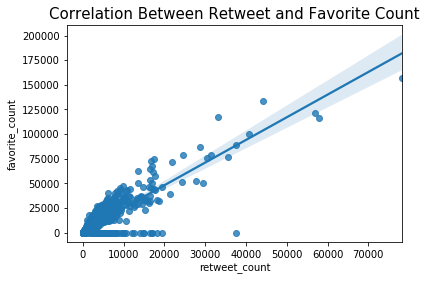

In [69]:
df_1 = df_twitter_master[['retweet_count', 'favorite_count']]
sns.regplot(df_1['retweet_count'], df_1['favorite_count']).set_title(
    "Correlation Between Retweet and Favorite Count", size = 15)

plt.savefig('Correlation Between Retweet and Favorite Count.jpg')

**Observations:**<br />
I chose this visualization because I noticed that while assessing for 3 insights, the most favorited and most retweeted tweet are the same. It got me thinking what is the correlation betweetn retweet_count and favorite_count variables? By looking at the graph above and doing a visual assessment, we can infer that a greater number of retweets will increase the likelihood that the tweet will also be favorited. There is a steep, positive correlation based on the best fit line of the graph. Every increase in retweet count will get multiple favorite hits. 

### Visualization #2: Algorithms' Success Rate###<br />
We will condense the 3 algorithms with 6 columns into 2 columns by melting it. We will then be able to use this new dataframe to create a boxplot graph. This graph will show how successful each of the alogrithims are compared to one another.

In [70]:
# Start off by gathering the columns from the master dataframe that we only need.
df_2 = df_twitter_master[['p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog']]
df_2.rename(columns={'p1_dog':'p1_bool','p2_dog':'p2_bool','p3_dog':'p3_bool'}, inplace=True)
# Test it out
df_2.head()

C:\Users\vijay Bisht\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,p1_conf,p1_bool,p2_conf,p2_bool,p3_conf,p3_bool
0,0.097049,False,0.085851,False,0.076110,False
1,0.323581,True,0.090647,True,0.068957,True
2,0.716012,True,0.078253,True,0.031379,True
3,0.170278,False,0.168086,True,0.040836,False
4,0.555712,True,0.225770,True,0.175219,True


In [112]:
# We want to melt each of the columns into 2 columns.
p1_df = pd.melt(df_2, value_vars=['p1_conf'],
          var_name='algorithm', value_name='confidence_interval')
p1_df['bool'] = df_2['p1_bool']

p1_df.head(3)

,algorithm,confidence_interval,bool
0,p1_conf,0.097049,False
1,p1_conf,0.323581,True
2,p1_conf,0.716012,True


In [120]:
p2_df = pd.melt(df_2, value_vars=['p2_conf'],
               var_name='algorithm', value_name= 'confidence_interval')
p2_df['bool'] = df_2['p2_bool']
p2_df.head(3)

,algorithm,confidence_interval,bool
0,p2_conf,0.085851,False
1,p2_conf,0.090647,True
2,p2_conf,0.078253,True


In [119]:
p3_df = pd.melt(df_2, value_vars=['p3_conf'],
               var_name='algorithm', value_name= 'confidence_interval')
p3_df['bool'] = df_2['p3_bool']
p3_df.head(3)

,algorithm,confidence_interval,bool
0,p3_conf,0.076110,False
1,p3_conf,0.068957,True
2,p3_conf,0.031379,True


In [118]:
df_2_new = pd.concat([p1_df, p2_df, p3_df], ignore_index= True)
df_2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   algorithm            6177 non-null   object 
 1   confidence_interval  6177 non-null   float64
 2   bool                 5358 non-null   object 
dtypes: float64(1), object(2)
memory usage: 144.9+ KB


In [117]:
df_2_new['algorithm'].replace('_conf','', regex=True, inplace=True)
df_2_new.head(3)

,algorithm,confidence_interval,bool
0,p1,0.097049,False
1,p1,0.323581,True
2,p1,0.716012,True


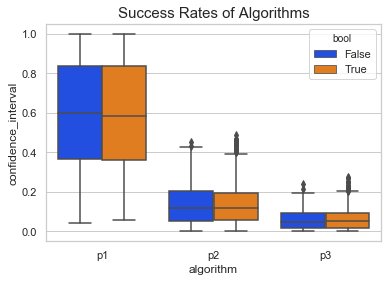

<Figure size 360x576 with 0 Axes>

In [116]:
sns.set(style="whitegrid")
sns.boxplot(x="algorithm", y="confidence_interval", hue="bool", data=df_2_new, palette="bright").set_title(
    'Success Rates of Algorithms', size= 15)
plt.figure(figsize=(5, 8))

plt.savefig('Success Rates of Algorithms.jpg')

**Observations:**<br />
Based on confidence intervals, p1 had highest percentage of confidence but there is a less amount of predictions that came out to be true. With p2, there is less confidence percentage (10-20%) but more predictions that came true. Lastly, p3 had the lowest confidence percentage(5-10%) and had about the same amount of true and false outcomes. The results show that there is approximately an equal amount of True and False outcomes for each of the algorithms, suggesting that each of the algorithms have a success rate of the same.

### Visualization #3: Checking the relation between the number of favorites and retweet counts

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


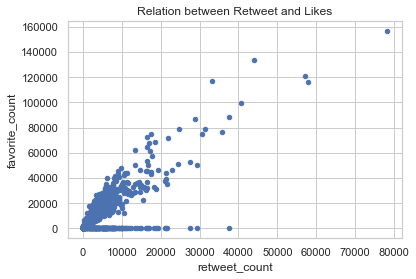

In [122]:
df_twitter_master.plot(x='retweet_count',y='favorite_count',kind='scatter',title='Relation between Retweet and Likes')

### Visualization #4: Checking the relation between the number of numerator rating and retweet counts

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


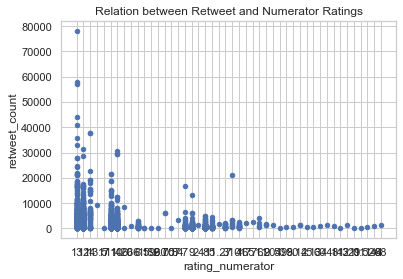

In [123]:
df_twitter_master.plot(x='rating_numerator',y='retweet_count',kind='scatter',title='Relation between Retweet and Numerator Ratings')

### Visualization #5: Checking the relation between the number of numerator rating and likes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


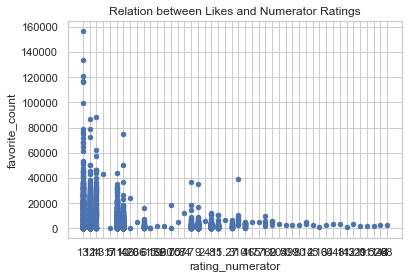

In [124]:
df_twitter_master.plot(x='rating_numerator',y='favorite_count',kind='scatter',title='Relation between Likes and Numerator Ratings')